# Qualifying results overview v2.1 (FastF1 2.2.8) Funcionando

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1
import fastf1.plotting
from fastf1.core import Laps

year = int(input('Año de la carrera: '))
carrera = int(input('Número de carrera: '))
print('Session type')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
sesion = input('Session: ')



Año de la carrera: 2022
Número de carrera: 11
Session type
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
Session: Q


In [2]:
fastf1.Cache.enable_cache('cache')  # replace with your cache directory

# we only want support for timedelta plotting in this example
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

session = fastf1.get_session(year, carrera, sesion)
session.load()

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


In [3]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['VER' 'SAI' 'MSC' 'HAM' 'OCO' 'ZHO' 'ALB' 'TSU' 'MAG' 'STR' 'LEC' 'ALO'
 'PER' 'GAS' 'LAT' 'VET' 'NOR' 'RIC' 'RUS' 'BOT']


In [4]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [5]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [6]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:04.984000        0 days 00:00:00
1     LEC 0 days 00:01:05.013000 0 days 00:00:00.029000
2     SAI 0 days 00:01:05.066000 0 days 00:00:00.082000
3     PER 0 days 00:01:05.404000 0 days 00:00:00.420000
4     RUS 0 days 00:01:05.431000 0 days 00:00:00.447000
5     OCO 0 days 00:01:05.726000 0 days 00:00:00.742000
6     MAG 0 days 00:01:05.879000 0 days 00:00:00.895000
7     MSC 0 days 00:01:06.011000 0 days 00:00:01.027000
8     ALO 0 days 00:01:06.103000 0 days 00:00:01.119000
9     GAS 0 days 00:01:06.160000 0 days 00:00:01.176000
10    ALB 0 days 00:01:06.230000 0 days 00:00:01.246000
11    BOT 0 days 00:01:06.319000 0 days 00:00:01.335000
12    RIC 0 days 00:01:06.613000 0 days 00:00:01.629000
13    STR 0 days 00:01:06.847000 0 days 00:00:01.863000
14    TSU 0 days 00:01:06.851000 0 days 00:00:01.867000
15    ZHO 0 days 00:01:06.901000 0 days 00:00:01.917000
16    LAT 0 days 00:01:07.003000 0 days 00:00:02

In [7]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

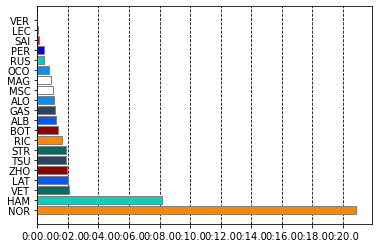

In [8]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

In [9]:
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

<Figure size 432x288 with 0 Axes>